In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
import os


In [26]:
# pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv(r'../data/pipeline-incidents-comprehensive-data.csv', encoding='latin-1')
data

Incident Number                  Incident Types Reported Date  \
0        INC2013-155            Release of Substance    11/16/2013   
1        INC2013-157            Release of Substance    11/21/2013   
2        INC2013-158                            Fire    11/22/2013   
3        INC2013-159  Operation Beyond Design Limits    11/22/2013   
4        INC2013-160            Release of Substance    11/24/2013   
...              ...                             ...           ...   
1774     INC2013-148            Release of Substance    10/20/2013   
1775     INC2013-150            Release of Substance    10/23/2013   
1776     INC2013-152            Release of Substance    10/29/2013   
1777     INC2013-153                            Fire    10/31/2013   
1778     INC2013-154            Release of Substance    11/02/2013   

     Nearest Populated Centre          Province  \
0                  Saint John     New Brunswick   
1                 Fort Nelson  British Columbia   
2                  Saint Leon          Manitoba   
3           Fort Saskatchewan           Alberta   
4                 Fort Nelson  British Columbia   
...                       ...               ...   
1774                   Gadsby           Alberta   
1775                 Burstall      Saskatchewan   
1776               Saint John     New Brunswick   
1777                 Edmonton           Alberta   
1778            Vermilion Bay           Ontario   

                                                Company  Status   Latitude  \
0        Maritimes & Northeast Pipeline Management Ltd.  Closed  45.273315   
1     Westcoast Energy Inc., carrying on business as...  Closed  58.653246   
2                               Enbridge Pipelines Inc.  Closed  49.362856   
3                                Cochin Pipe Lines Ltd.  Closed  53.700716   
4     Westcoast Energy Inc., carrying on business as...  Closed  58.653246   
...                                                 ...     ...        ...   
1774                         NOVA Gas Transmission Ltd.  Closed  52.388200   
1775                      TransCanada PipeLines Limited  Closed  50.676806   
1776     Maritimes & Northeast Pipeline Management Ltd.  Closed  45.273315   
1777                            Enbridge Pipelines Inc.  Closed  53.547403   
1778                      TransCanada PipeLines Limited  Closed  49.825120   

       Longitude Approximate Volume Released (m3)  ...  Repair type  \
0     -66.063308                         500.0000  ...          NaN   
1    -122.684823                           0.0001  ...          NaN   
2     -98.590633                   Not Applicable  ...          NaN   
3    -113.209466                   Not Applicable  ...          NaN   
4    -122.684823                     Not Provided  ...          NaN   
...          ...                              ...  ...          ...   
1774 -112.216200                     Not Provided  ...          NaN   
1775 -109.929667                     Not Provided  ...  Replacement   
1776  -66.063308                           5.7000  ...          NaN   
1777 -113.355714                   Not Applicable  ...          NaN   
1778  -93.627265                     Not Provided  ...          NaN   

     Repair date Equipment or component has never been inspected  \
0            NaN                                              No   
1            NaN                                              No   
2            NaN                                              No   
3            NaN                                              No   
4            NaN                                              No   
...          ...                                             ...   
1774         NaN                                              No   
1775  2013-11-13                                              No   
1776         NaN                                              No   
1777         NaN                                              No   
1778         

In [3]:
data['Incident Types'].value_counts()

Incident Types
Release of Substance                                       758
Operation Beyond Design Limits                             411
Fire                                                       385
Serious Injury (CER or TSB)                                108
Adverse Environmental Effects                               53
Explosion                                                   21
Fire, Release of Substance                                  14
Release of Substance, Adverse Environmental Effects         11
Fatality                                                     7
Explosion, Fire                                              4
Explosion, Fire, Release of Substance                        2
Serious Injury (CER or TSB), Fire, Release of Substance      2
Serious Injury (CER or TSB), Fire                            1
Serious Injury (CER or TSB), Release of Substance            1
Release of Substance, Operation Beyond Design Limits         1
Name: count, dtype: int64

In [5]:
incidents = data['Incident Types'].value_counts()
incidents

Incident Types
Release of Substance                                       758
Operation Beyond Design Limits                             411
Fire                                                       385
Serious Injury (CER or TSB)                                108
Adverse Environmental Effects                               53
Explosion                                                   21
Fire, Release of Substance                                  14
Release of Substance, Adverse Environmental Effects         11
Fatality                                                     7
Explosion, Fire                                              4
Explosion, Fire, Release of Substance                        2
Serious Injury (CER or TSB), Fire, Release of Substance      2
Serious Injury (CER or TSB), Fire                            1
Serious Injury (CER or TSB), Release of Substance            1
Release of Substance, Operation Beyond Design Limits         1
Name: count, dtype: int64

In [9]:
pd.DataFrame(incidents, index = incidents.index)

count
Incident Types                                           
Release of Substance                                  758
Operation Beyond Design Limits                        411
Fire                                                  385
Serious Injury (CER or TSB)                           108
Adverse Environmental Effects                          53
Explosion                                              21
Fire, Release of Substance                             14
Release of Substance, Adverse Environmental Eff...     11
Fatality                                                7
Explosion, Fire                                         4
Explosion, Fire, Release of Substance                   2
Serious Injury (CER or TSB), Fire, Release of S...      2
Serious Injury (CER or TSB), Fire                       1
Serious Injury (CER or TSB), Release of Substance       1
Release of Substance, Operation Beyond Design L...      1

<Axes: ylabel='Incident Types'>

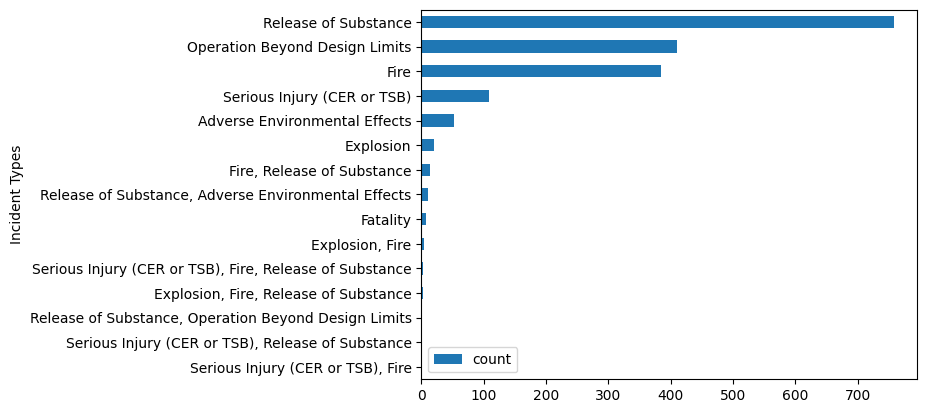

In [16]:
pd.DataFrame(incidents, index = incidents.index).sort_values(by='count').plot.barh()

<Axes: xlabel='island', ylabel='body_mass_g'>

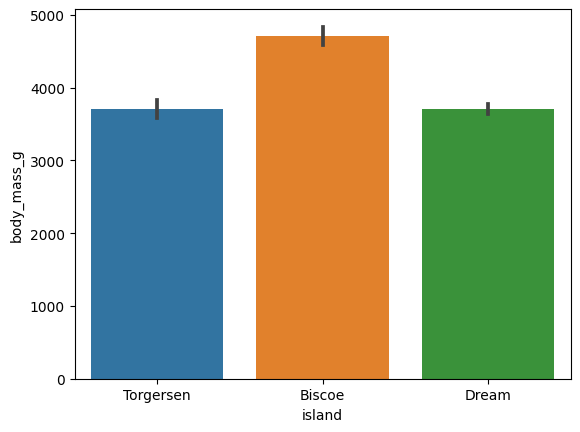

In [17]:
df = sns.load_dataset("penguins")
sns.barplot(data=df, x="island", y="body_mass_g")

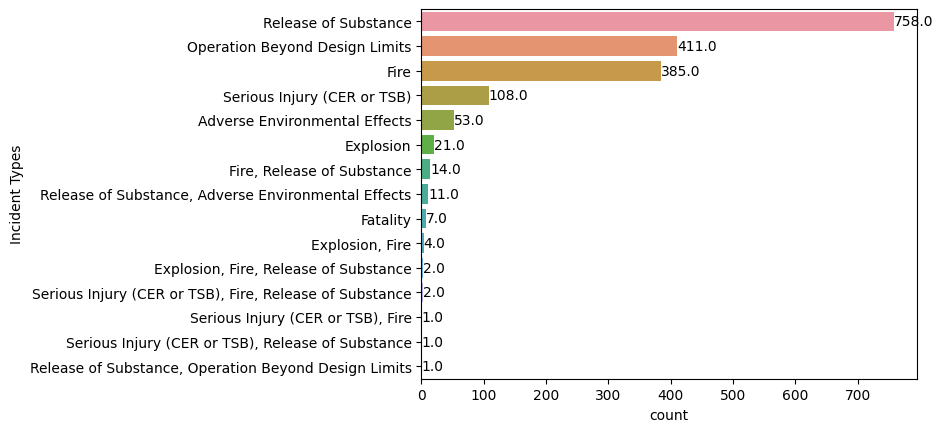

In [24]:
df = pd.DataFrame(incidents, index = incidents.index).sort_values(by='count', ascending=False)
ax = sns.barplot(data=df, x="count", y=df.index)
ax.bar_label(ax.containers[0], fmt='%.1f');

In [29]:
m = folium.Map(location=[45.5236, -122.6750])
m

In [73]:
provinces = pd.DataFrame(data['Province'].value_counts())
# provinces['prov_name_en'] = provinces.index
provinces = provinces.reset_index()
provinces.rename(columns = {"count":"incident_counts"}, inplace=True)
# provinces.reindex(axis=0)
provinces

Province  incident_counts
0                Alberta              614
1       British Columbia              498
2                Ontario              233
3           Saskatchewan              166
4          New Brunswick              103
5               Manitoba               79
6                 Quebec               53
7            Nova Scotia               25
8  Northwest Territories                8

In [85]:
state_geo = json.loads("../data/georef-canada-province@public.json")
# state_data = provinces

# m = folium.Map(location=[48, -102], zoom_start=3)

# folium.Choropleth(
#     geo_data=state_geo,
#     name="choropleth",
#     data=state_data,
#     columns=["Province", "incident_counts"],
#     key_on="prov_name_en",
#     fill_color="YlGn",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="Unemployment Rate (%)",
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [80]:
state_geo

geo_point_2d  \
0   {'lon': -114.51101438986483, 'lat': 55.1689029...   
1   {'lon': -97.43375328505664, 'lat': 54.93018410...   
2   {'lon': -135.51007960983821, 'lat': 63.6304438...   
3   {'lon': -105.89075902236681, 'lat': 54.4167141...   
4   {'lon': -63.32450309629852, 'lat': 45.15131558...   
5   {'lon': -118.98262958354398, 'lat': 66.3689231...   
6   {'lon': -63.24228135586117, 'lat': 46.38954858...   
7   {'lon': -88.8416338799438, 'lat': 71.041389444...   
8   {'lon': -71.78624104931967, 'lat': 53.39528349...   
9   {'lon': -86.0409603890758, 'lat': 50.452667579...   
10  {'lon': -124.7656381299199, 'lat': 54.75518309...   
11  {'lon': -60.51575069823122, 'lat': 52.88843621...   
12  {'lon': -66.37667726184117, 'lat': 46.61898879...   

                                            geo_shape  year prov_code  \
0   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [48]   
1   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [46]   
2   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [60]   
3   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [47]   
4   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [12]   
5   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [61]   
6   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [11]   
7   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [62]   
8   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [24]   
9   {'type': 'Feature', 'geometry': {'coordinates'...  2021      [35]   
10  {'type': 'Feature', 'geometry': {'coordinates'...  2021      [59]   
11  {'type': 'Feature', 'geometry': {'coordinates'...  2021      [10]   
12  {'type': 'Feature', 'geometry': {'coordinates'...  2021      [13]   

                   prov_name_en prov_area_code               prov_type  \
0                     [Alberta]            CAN                province   
1                    [Manitoba]            CAN                province   
2                       [Yukon]            CAN  territory / territoire   
3                [Saskatchewan]            CAN                province   
4                 [Nova Scotia]            CAN                province   
5       [Northwest Territories]            CAN  territory / territoire   
6        [Prince Edward Island]            CAN                province   
7                     [Nunavut]            CAN  territory / territoire   
8                      [Quebec]            CAN                province   
9                     [Ontario]            CAN                province   
10           [British Columbia]            CAN                province   
11  [Newfoundland and Labrador]            CAN                province   
12              [New Brunswick]            CAN                province   

                 prov_name_fr  
0                     Alberta  
1                    Manitoba  
2                       Yukon  
3                Saskatchewan  
4             Nouvelle-Écosse  
5   Territoires du Nord-Ouest  
6       Île-du-Prince-Édouard  
7                     Nunavut  
8                      Québec  
9                     Ontario  
10       Colombie-Britannique  
11    Terre-Neuve-et-Labrador  
12          Nouveau-Brunswick

In [2]:
# https://www.kaggle.com/code/anki112279/heatmap-by-canada-s-provinces

In [3]:
import plotly.express as px
import pandas as pd
import geopandas as gpd

ModuleNotFoundError: No module named 'plotly'